In [3]:
import pandas as pd
import seaborn as sns
import os

In [4]:
basefolder = '/home/hu-eki/Data/BCNB/experiments'

experiments = os.listdir(basefolder)


In [5]:
experiment = experiments[0]

rounds = os.listdir(os.path.join(basefolder, experiment))
rounds

['20250216_041858',
 '20250216_041631',
 '20250216_044439',
 '20250220_084049',
 '20250219_234357',
 '20250216_050921']

In [6]:
all_results = []
for experiment in experiments:
    rounds = os.listdir(os.path.join(basefolder, experiment))
    for round in rounds:
        try:
            df_res = pd.read_csv(os.path.join(basefolder, experiment, round, 'results.csv'))
        except FileNotFoundError:
            print(f'No results for {experiment} round {round}')
            continue
        df_res['experiment'] = experiment
        df_res['round'] = round

        all_results.append(df_res)

df = pd.concat(all_results)

No results for Defaults+train_epochs;1 round 20250219_213557
No results for Defaults+train_epochs;1 round 20250219_213552
No results for Defaults+train_epochs;1,smoothing;True round 20250220_165653
No results for Defaults+train_epochs;1,smoothing;True round 20250220_181314
No results for Defaults+train_epochs;1,smoothing;True round 20250220_181428
No results for Defaults+train_epochs;1,smoothing;True round 20250220_180347
No results for Defaults+train_epochs;1,smoothing;True round 20250220_181628
No results for Defaults+train_epochs;1,smoothing;True round 20250220_173040
No results for Defaults+train_epochs;1,smoothing;True round 20250220_181832
No results for Defaults+train_epochs;1,smoothing;True round 20250220_173301
No results for Defaults+ round 20250219_101858
No results for Defaults+ round 20250219_102141


In [7]:
list(df.experiment.unique())

experiment_order = [
    'Defaults+train_epochs;0',
    'Defaults+train_epochs;0,stain_normalize_inference;True',
    'Defaults+',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True',
    'Defaults+log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True',
    'Defaults+normalize_total;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True',
    'Defaults+normalize_total;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
]

In [14]:
df.head()

df.to_csv('all_results.csv', index=False)

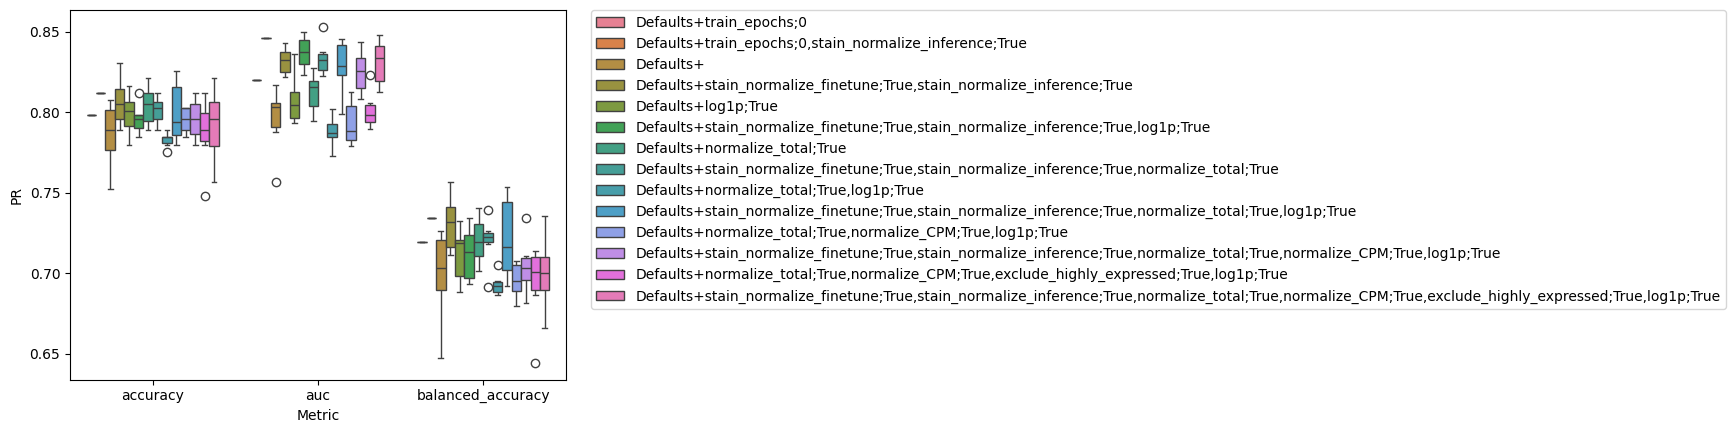

In [9]:
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Metric', y='PR', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

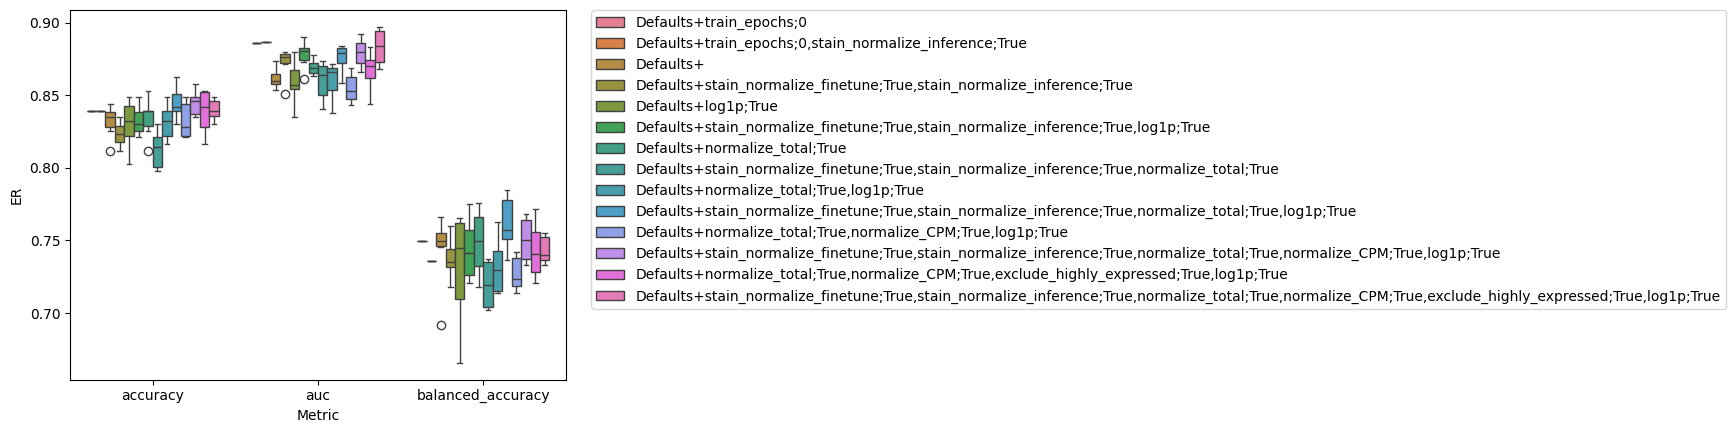

In [10]:
sns.boxplot(data=df, x='Metric', y='ER', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

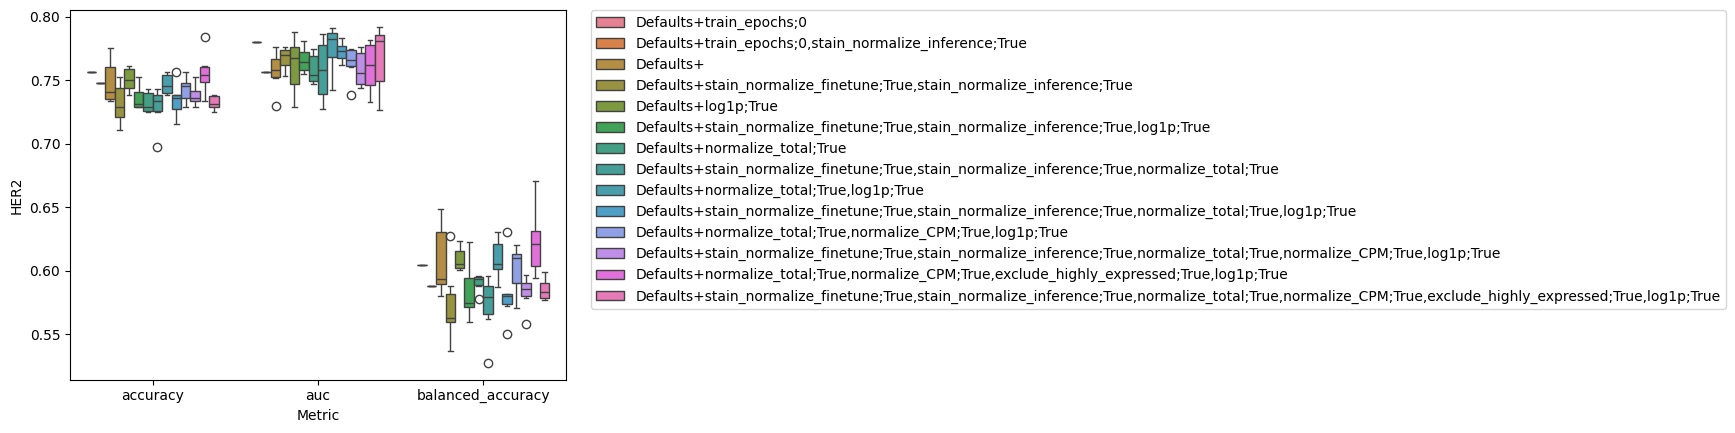

In [11]:
sns.boxplot(data=df, x='Metric', y='HER2', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Defaults+train_epochs;0'),
  Text(1, 0, 'Defaults+train_epochs;0,stain_normalize_inference;True'),
  Text(2, 0, 'Defaults+'),
  Text(3, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True'),
  Text(4, 0, 'Defaults+log1p;True'),
  Text(5, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True'),
  Text(6, 0, 'Defaults+normalize_total;True'),
  Text(7, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True'),
  Text(8, 0, 'Defaults+normalize_total;True,log1p;True'),
  Text(9, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True'),
  Text(10, 0, 'Defaults+normalize_total;True,normalize_CPM;True,log1p;True'),
  Text(11, 0, 'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,log1p;True'),
  Text(12, 0, 'Defaults+normalize_total;

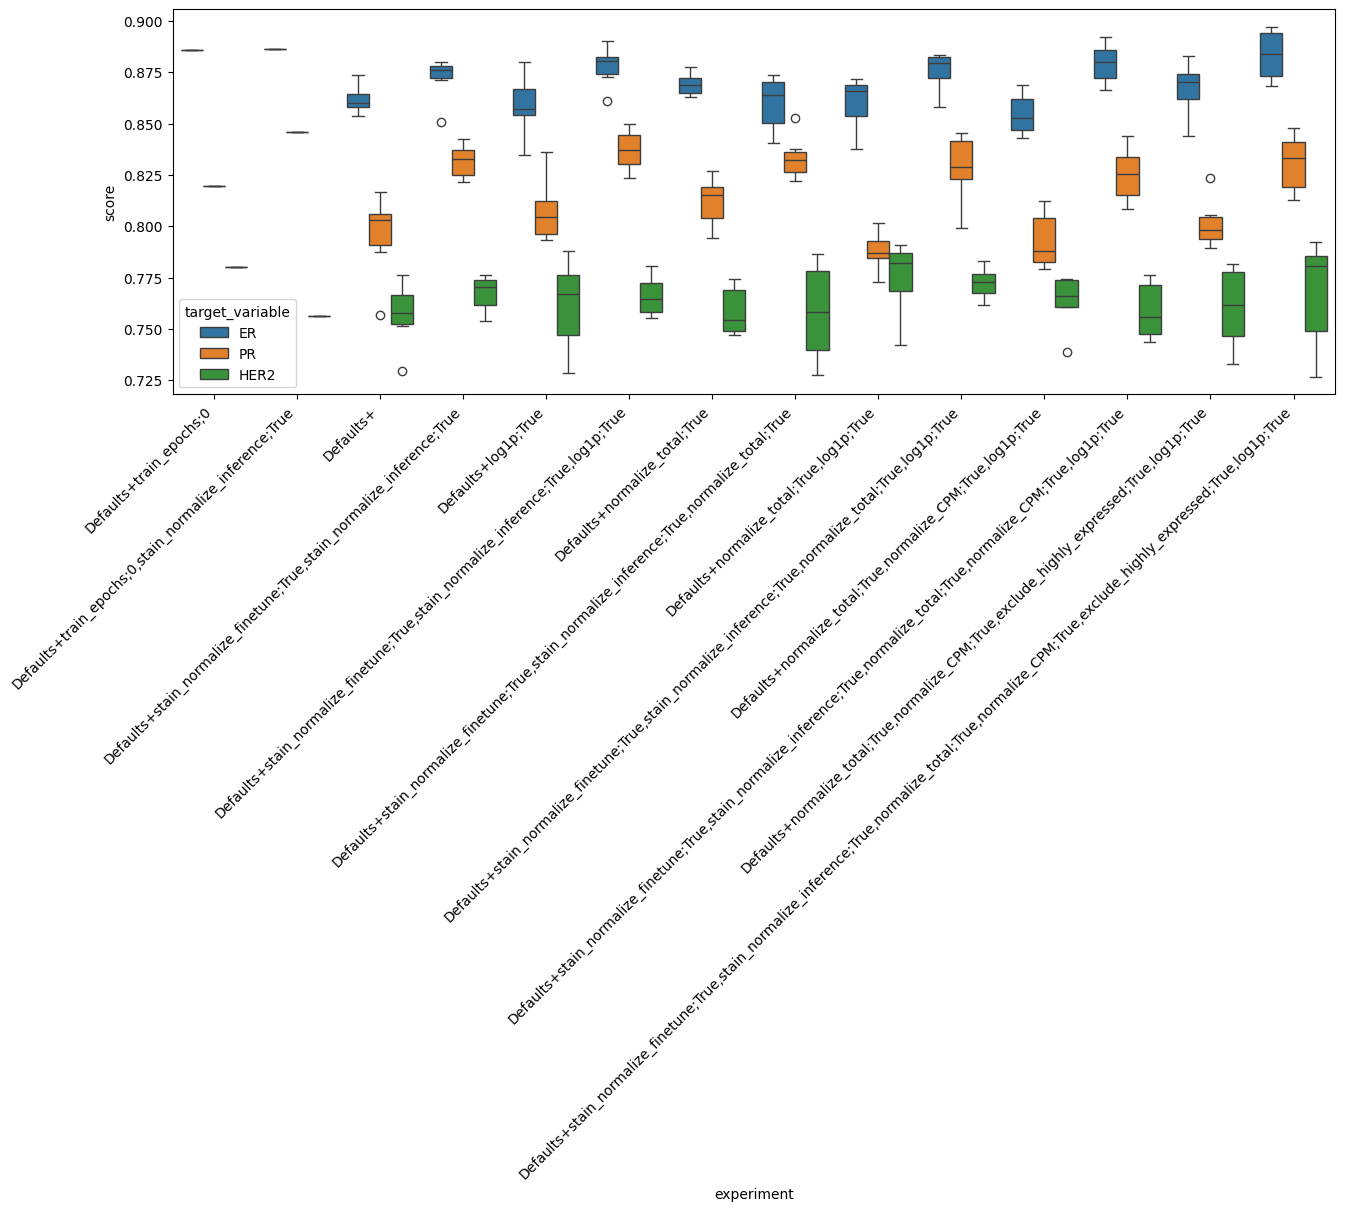

In [13]:
df_long = df.melt(id_vars=['Model', 'Seed', 'Metric', 'experiment', 'round'], var_name='target_variable', value_name='score')

fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df_long[df_long.Metric == 'auc'], x='experiment', y='score', hue='target_variable', order=experiment_order)
plt.xticks(rotation=45, ha='right')